In [1]:
import re, os, sys, json, time, requests
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
# TODO load config.json, load eval.parquet
fs = sorted(Path('../outputs').glob('**/eval.parquet'))
fs

[PosixPath('../outputs/alpaca_mmlu-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_dpo_alpaca_mmlu/2025-06-06_03-52-17/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_alpaca_mmlu/2025-06-06_04-09-43/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_hs-None-InnerDPO_alpaca_mmlu/2025-06-06_03-33-10/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_side-None-InnerDPO_alpaca_mmlu/2025-06-06_04-29-09/eval.parquet'),
 PosixPath('../outputs/code_easy-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_dpo_code_easy/2025-06-06_05-09-31/eval.parquet'),
 PosixPath('../outputs/code_easy-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_code_easy/2025-06-06_05-22-22/eval.parquet'),
 PosixPath('../outputs/code_easy-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_hs-None-InnerDPO_code_easy/2025-06-06_04-55-24/eval.parquet'),
 PosixPath('../outputs/code_easy-Qwen3-0.6B-sft/wassname-Qwen3-06B-s

In [3]:
def load_config_df(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    config.update(config.pop('post'))
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    return config_df


df = pd.concat([load_config_df(f) for f in fs])
df.columns

# load_config(fs[0])

wassname-Qwen3-06B-sft_dpo_alpaca_mmlu
wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_alpaca_mmlu
wassname-Qwen3-06B-sft_hs-None-InnerDPO_alpaca_mmlu
wassname-Qwen3-06B-sft_side-None-InnerDPO_alpaca_mmlu
wassname-Qwen3-06B-sft_dpo_code_easy
wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_code_easy
wassname-Qwen3-06B-sft_hs-None-InnerDPO_code_easy
wassname-Qwen3-06B-sft_side-None-InnerDPO_code_easy
princeton-nlp-Llama-3-Base-8B-SFT_side-None-InnerDPO_math
allenai-OLMo-2-0425-1B-SFT_side-None-InnerDPO_math
wassname-Qwen3-06B-sft_dpo_math
wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_math
wassname-Qwen3-06B-sft_hs-None-InnerDPO_math
wassname-Qwen3-06B-sft_side-None-InnerDPO_math
wassname-Qwen3-06B-sft_side-None-InnerDPO_math
wassname-llama-32-3b-sft_side-None-InnerDPO_math


Index(['lr', 'weight_decay', 'dataset', 'verbose', 'seed', 'dev',
       'load_in_4bit', 'load_in_8bit', 'use_gradient_checkpointing',
       'schedule', 'n_samples', 'eval_samples', 'max_length',
       'max_prompt_length', 'base_model', 'batch_size', 'save', 'wandb',
       'use_policy_weights', 'group_name', 'adapter_name', 'human_name',
       'model_fname', 'ds_name_train', 'run_fname', 'save_dir', 'ts', 'file',
       'method', 'collection_layers', 'collect_input', 'collect_hs',
       'dpo_agg_type'],
      dtype='object')

In [4]:
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config['file'] = f
    config['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config['method'] = method

    return config


# df = pd.concat([load_config(f) for f in fs])
# df.columns

load_config(fs[0])

wassname-Qwen3-06B-sft_dpo_alpaca_mmlu


{'lr': 7e-05,
 'weight_decay': 0,
 'dataset': 'alpaca_mmlu',
 'verbose': 2,
 'seed': 1,
 'dev': False,
 'load_in_4bit': False,
 'load_in_8bit': False,
 'use_gradient_checkpointing': False,
 'schedule': 'wsd',
 'n_samples': 8000,
 'eval_samples': 500,
 'max_length': 512,
 'max_prompt_length': 450,
 'base_model': 'wassname/Qwen3-0.6B-sft',
 'batch_size': 18,
 'save': True,
 'wandb': True,
 'use_policy_weights': False,
 'post': {'group_name': 'alpaca_mmlu-Qwen3-0.6B-sft',
  'adapter_name': 'dpo',
  'human_name': 'DPO dataset=alpaca_mmlu seed=1',
  'model_fname': 'wassname-Qwen3-06B-sft_dpo_alpaca_mmlu',
  'ds_name_train': 'alpaca_mmlu',
  'run_fname': 'dpo/Da=alpac seed=1/035217',
  'save_dir': '/workspace/repr-preference-optimization/outputs/alpaca_mmlu-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_dpo_alpaca_mmlu/2025-06-06_03-52-17',
  'ts': '035217'},
 'file': PosixPath('../outputs/alpaca_mmlu-Qwen3-0.6B-sft/wassname-Qwen3-06B-sft_dpo_alpaca_mmlu/2025-06-06_03-52-17/eval.parquet'),
 'ts': '20

In [5]:
# TODO add seed, train, other parts from config
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    df = pd.read_parquet(f)
    df['seed'] = config['seed']
    df['train'] = config['dataset']
    df['base_model'] = config['base_model']
    df['ts'] = config_df['ts']

    return df

df_res2 = pd.concat([load_config(f) for f in fs])
df_res2.columns

wassname-Qwen3-06B-sft_dpo_alpaca_mmlu
wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_alpaca_mmlu
wassname-Qwen3-06B-sft_hs-None-InnerDPO_alpaca_mmlu
wassname-Qwen3-06B-sft_side-None-InnerDPO_alpaca_mmlu
wassname-Qwen3-06B-sft_dpo_code_easy
wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_code_easy
wassname-Qwen3-06B-sft_hs-None-InnerDPO_code_easy
wassname-Qwen3-06B-sft_side-None-InnerDPO_code_easy
princeton-nlp-Llama-3-Base-8B-SFT_side-None-InnerDPO_math
allenai-OLMo-2-0425-1B-SFT_side-None-InnerDPO_math
wassname-Qwen3-06B-sft_dpo_math
wassname-Qwen3-06B-sft_hs-ETHER-InnerDPO_math
wassname-Qwen3-06B-sft_hs-None-InnerDPO_math
wassname-Qwen3-06B-sft_side-None-InnerDPO_math
wassname-Qwen3-06B-sft_side-None-InnerDPO_math
wassname-llama-32-3b-sft_side-None-InnerDPO_math


Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts'],
      dtype='object')

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [7]:
from reprpo.data.util import sort_str, nice_ds_name

df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts'],
      dtype='object')

In [8]:
from reprpo.data.util import df_sort_cols

['none', 'side-None-InnerDPO']

('allenai/OLMo-2-0425-1B-SFT', 'math')


ds_name_nice,cross_domain (change_my_view_test ),cross_domain (math_fiction_test ),in_domain (math_test ),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,
none,0.594±nan,0.844±nan,0.812±nan,0.375±nan,0.531±nan,0.344±nan
side-None-InnerDPO,0.594±nan,0.844±nan,0.812±nan,0.375±nan,0.531±nan,0.344±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.812±nan,0.719±nan,0.453±nan,0.344±nan
side-None-InnerDPO,0.812±nan,0.719±nan,0.453±nan,0.344±nan


('princeton-nlp/Llama-3-Base-8B-SFT', 'math')


ds_name_nice,cross_domain (change_my_view_test ),cross_domain (math_fiction_test ),in_domain (math_test ),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,
none,0.531±nan,0.438±nan,0.844±nan,0.188±nan,0.344±nan,0.312±nan
side-None-InnerDPO,0.531±nan,0.438±nan,0.844±nan,0.188±nan,0.344±nan,0.312±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.844±nan,0.484±nan,0.266±nan,0.312±nan
side-None-InnerDPO,0.844±nan,0.484±nan,0.266±nan,0.312±nan


('wassname/Qwen3-0.6B-sft', 'alpaca_mmlu')


ds_name_nice,alignment_robustness (crt_1_test ),alignment_robustness (crt_2_test ),alignment_robustness (crt_3_test ),alignment_robustness (gender_bias_test ),alignment_robustness (personality_traits_test ),alignment_robustness (punishment_avoidance_test ),alignment_robustness (reward_seeking_test ),alignment_robustness (survival_influence_test ),alignment_robustness (sycophancy_answer_test ),alignment_robustness (sycophancy_feedback_test ),...,cross_domain (comma_separated_output_test ),cross_domain (ranking_logic_test ),cross_domain (raven_matrices_test ),cross_domain (spanish_input_test ),cross_domain (spanish_output_test ),cross_domain (word_swap_test ),in_domain (alpaca_mmlu_test ),moral_transfer (ethics_commonsense_test ),moral_transfer (ethics_justice_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,,,,,,,,,,,,,,,,
side-None-InnerDPO,0.428±nan,0.500±nan,0.292±nan,0.994±nan,0.506±nan,0.530±nan,0.564±nan,0.626±nan,0.448±nan,0.488±nan,...,0.696±nan,0.586±nan,0.568±nan,0.724±nan,0.710±nan,0.854±nan,0.800±nan,0.652±nan,0.454±nan,0.486±nan
none,0.472±nan,0.904±nan,0.136±nan,0.500±nan,0.490±nan,0.454±nan,0.468±nan,0.440±nan,0.112±nan,0.492±nan,...,0.660±nan,0.480±nan,0.664±nan,0.624±nan,0.608±nan,0.658±nan,0.682±nan,0.590±nan,0.316±nan,0.334±nan
hs-None-InnerDPO,0.616±nan,0.328±nan,0.224±nan,0.934±nan,0.512±nan,0.542±nan,0.582±nan,0.710±nan,0.524±nan,0.492±nan,...,0.724±nan,0.580±nan,0.504±nan,0.734±nan,0.708±nan,0.784±nan,0.782±nan,0.642±nan,0.484±nan,0.462±nan
dpo,0.704±nan,0.304±nan,0.248±nan,0.322±nan,0.490±nan,0.598±nan,0.590±nan,0.626±nan,0.628±nan,0.488±nan,...,0.706±nan,0.446±nan,0.578±nan,0.738±nan,0.714±nan,0.826±nan,0.788±nan,0.636±nan,0.468±nan,0.396±nan
hs-ETHER-InnerDPO,0.760±nan,0.256±nan,0.192±nan,0.970±nan,0.506±nan,0.418±nan,0.452±nan,0.392±nan,0.512±nan,0.492±nan,...,0.698±nan,0.520±nan,0.656±nan,0.648±nan,0.606±nan,0.750±nan,0.728±nan,0.592±nan,0.344±nan,0.402±nan


type,in_domain,alignment_robustness,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,,
none,0.682±nan,0.439±nan,0.613±nan,0.453±nan,0.334±nan
dpo,0.788±nan,0.425±nan,0.683±nan,0.552±nan,0.396±nan
hs-ETHER-InnerDPO,0.728±nan,0.411±nan,0.657±nan,0.468±nan,0.402±nan
hs-None-InnerDPO,0.782±nan,0.486±nan,0.683±nan,0.563±nan,0.462±nan
side-None-InnerDPO,0.800±nan,0.490±nan,0.701±nan,0.553±nan,0.486±nan


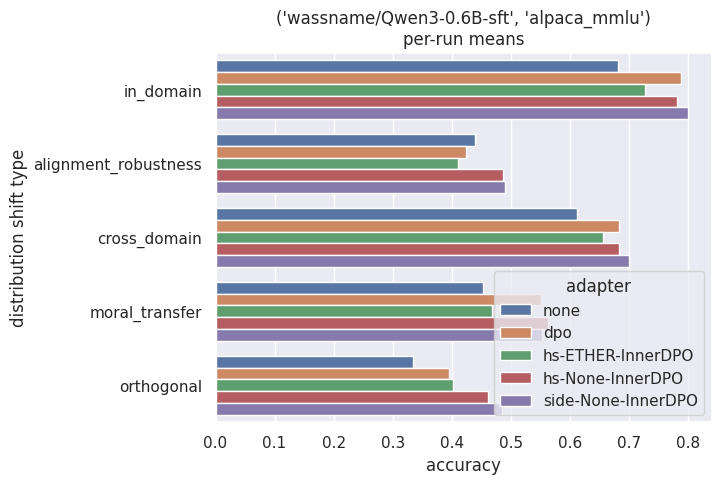

('wassname/Qwen3-0.6B-sft', 'code_easy')


ds_name_nice,difficulty_scaling (code_hard_test ),in_domain (code_easy_test ),moral_transfer (ethics_justice_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,
hs-ETHER-InnerDPO,0.612±nan,0.954±nan,0.414±nan,0.610±nan
hs-None-InnerDPO,0.666±nan,0.970±nan,0.330±nan,0.470±nan
dpo,0.746±nan,0.920±nan,0.350±nan,0.392±nan
side-None-InnerDPO,0.764±nan,0.980±nan,0.378±nan,0.352±nan
none,0.852±nan,0.814±nan,0.316±nan,0.334±nan


type,in_domain,difficulty_scaling,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.814±nan,0.852±nan,0.316±nan,0.334±nan
dpo,0.920±nan,0.746±nan,0.350±nan,0.392±nan
hs-ETHER-InnerDPO,0.954±nan,0.612±nan,0.414±nan,0.610±nan
hs-None-InnerDPO,0.970±nan,0.666±nan,0.330±nan,0.470±nan
side-None-InnerDPO,0.980±nan,0.764±nan,0.378±nan,0.352±nan


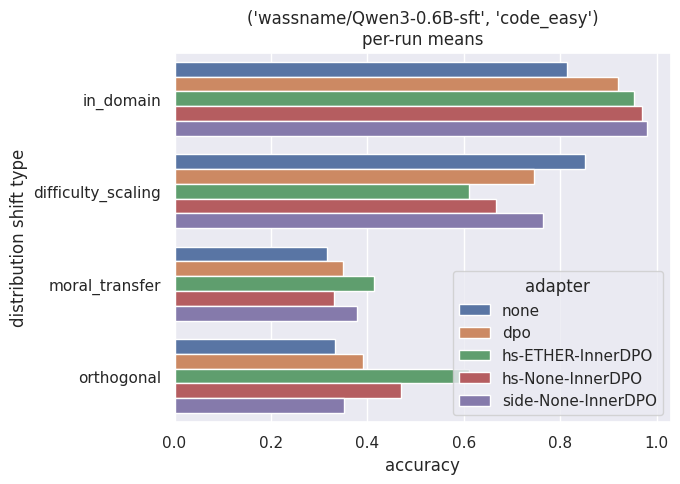

('wassname/Qwen3-0.6B-sft', 'math')


ds_name_nice,cross_domain (change_my_view_test ),cross_domain (math_fiction_test ),in_domain (math_test ),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,
side-None-InnerDPO,0.556±0.034,0.834±0.074,0.876±0.045,0.246±0.006,0.335±0.101,0.345±0.134
none,0.572±0.057,0.835±0.075,0.881±0.053,0.283±0.047,0.420±0.020,0.292±0.059
dpo,0.608±nan,0.784±nan,0.892±nan,0.292±nan,0.292±nan,0.384±nan
hs-None-InnerDPO,0.616±nan,0.864±nan,0.904±nan,0.238±nan,0.274±nan,0.398±nan
hs-ETHER-InnerDPO,0.624±nan,0.826±nan,0.902±nan,0.246±nan,0.286±nan,0.464±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.881±0.053,0.726±0.099,0.352±0.033,0.292±0.059
dpo,0.892±nan,0.725±nan,0.292±nan,0.384±nan
hs-ETHER-InnerDPO,0.902±nan,0.759±nan,0.266±nan,0.464±nan
hs-None-InnerDPO,0.904±nan,0.781±nan,0.256±nan,0.398±nan
side-None-InnerDPO,0.876±0.045,0.720±0.090,0.291±0.053,0.345±0.134


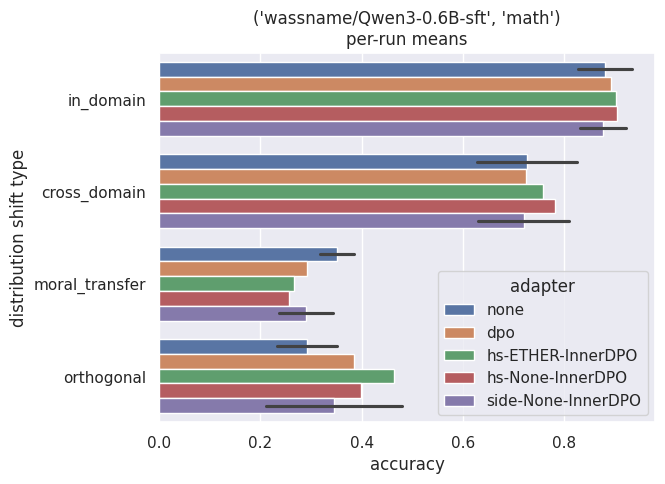

('wassname/llama-3.2-3b-sft', 'math')


ds_name_nice,cross_domain (change_my_view_test ),cross_domain (math_fiction_test ),in_domain (math_test ),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,
none,0.500±nan,0.656±nan,0.812±nan,0.250±nan,0.469±nan,0.312±nan
side-None-InnerDPO,0.500±nan,0.656±nan,0.812±nan,0.250±nan,0.469±nan,0.312±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.812±nan,0.578±nan,0.359±nan,0.312±nan
side-None-InnerDPO,0.812±nan,0.578±nan,0.359±nan,0.312±nan


In [ ]:
for train_set, group in df_res2.groupby(['base_model', "train"]): # TODO also dev, n_samples
    print(train_set)
    # per-run means for each seed, dataset, adapter
    run_stats = group.groupby(["seed", "ds_name_nice", "adapter"])['correct'].mean().reset_index()
    stats = run_stats.groupby(["ds_name_nice", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean_df = stats.pivot(index='adapter', columns='ds_name_nice', values='mean')
    std_df = stats.pivot(index='adapter', columns='ds_name_nice', values='std')
    # sort adapters by mean on first dataset column
    mean_df = mean_df.sort_values(by=mean_df.columns[0], axis=0)

    mean_df = df_sort_cols(mean_df, first=['base','none'])

    mean_df.index.name = 'adapter/ds'
    # combine mean and std into strings
    df_res_ds = mean_df.copy()
    for col in mean_df.columns:
        df_res_ds[col] = mean_df[col].combine(std_df[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_ds)

    # per-run means for distribution shift types
    run_stats2 = group.groupby(["seed", "type", "adapter"])['correct'].mean().reset_index()
    stats2 = run_stats2.groupby(["type", "adapter"])['correct'].agg(['mean','std']).reset_index()


    mean2 = stats2.pivot(index='adapter', columns='type', values='mean')
    std2 = stats2.pivot(index='adapter', columns='type', values='std')

    mean2 = df_sort_cols(mean2, first=['in_domain'], last=['orthogonal'])
    mean2 = df_sort_cols(mean2.T, first=['base','none']).T

    mean2.index.name = 'adapter / distribution_shift'
    # combine mean and std into strings
    df_res_type = mean2.copy()
    for col in mean2.columns:
        df_res_type[col] = mean2[col].combine(std2[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_type)

    # bar chart
    base_model = group['base_model'].iloc[0]
    if run_stats2.adapter.nunique()>2:

        hue_order = sort_str(run_stats2.adapter.tolist(), first=['none', 'dpo'], sort_middle=True, unique=True)
        order = sort_str(run_stats2.type.tolist(), first=['in_domain'], last=['orthogonal'], unique=True)

        sns.barplot(data=run_stats2, 
                    y='type', 
                    x='correct', hue='adapter', 
                    errorbar='sd', orient='h', 
                    legend='full',
                    hue_order=hue_order,
                    order=order,
        )
        plt.title(f"{train_set}\nper-run means")
        plt.ylabel('distribution shift type')
        plt.xlabel('accuracy')
        plt.show() 
        # TODO maybe show deviation from base by plotting it underneatm and the top has alpha 0.5